In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import sys
sys.path.append('../src')
import tensorflow as tf
import tensorflow.keras as k
import pandas as pd
import numpy as np
import test_submit
from scipy import stats
import matplotlib.pyplot as plt

In [17]:
train = pd.read_pickle('../inputs/dataset/train.pkl')
investment_id = train.pop('investment_id')
y = train.pop('target')

In [18]:
investment_ids = list(investment_id.unique())
investment_id_size = len(investment_ids) + 1
investment_id_lookup_layer = k.layers.IntegerLookup(max_tokens=investment_id_size)
investment_id_lookup_layer.adapt(pd.DataFrame({"investment_ids":investment_ids}))

In [37]:
features = [f'f_{i}' for i in range(300)]
batch_size = 1024
epochs = 30

def get_model():
    # activation = 'relu'
    # kernel_regularizer = None
    activation = 'swish'
    kernel_regularizer = 'l2'

    investment_id_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    investment_id_x = k.layers.Embedding(investment_id_size, 32, input_length=1)(investment_id_x)
    investment_id_x = k.layers.Reshape((-1, ))(investment_id_x)
    investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    


    feature_inputs = k.Input((300,), dtype=tf.float16)
    feature_x = k.layers.Dense(256, activation=activation)(feature_inputs)
    feature_x = k.layers.Dense(256, activation=activation)(feature_x)
    feature_x = k.layers.Dense(256, activation=activation)(feature_x)

    x = k.layers.Concatenate(axis=1)([investment_id_x, feature_x])
    x = k.layers.Dense(512, activation=activation, kernel_regularizer=kernel_regularizer)(x)
    x = k.layers.Dense(128, activation=activation, kernel_regularizer=kernel_regularizer)(x)
    x = k.layers.Dense(32, activation=activation, kernel_regularizer=kernel_regularizer)(x)

    # output = k.layers.Dense(1, activation='sigmoid')(x)
    output = k.layers.Dense(1)(x)

    model = k.Model(inputs=[investment_id_inputs, feature_inputs], outputs=[output])
    model.compile(optimizer=k.optimizers.Adam(0.001), loss='mse', metrics=['mse', 'mae', 'mape'])

    return model

def eval(model):
    return test_submit.eval(lambda test: model.predict(test[features]))

def make_dataset(feature, y, investment_id, mode="train"):
    ds = tf.data.Dataset.from_tensor_slices(((investment_id, feature), y))
    if mode == "train":
        ds = ds.shuffle(4096)
    ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
    return ds


def get_callbacks(i):
    checkpoint = k.callbacks.ModelCheckpoint(f'../outputs/models/simple_nn_{i}', save_best_only=True)
    earlystopping = k.callbacks.EarlyStopping(patience=10)
    return [checkpoint, earlystopping]


/opt/conda/envs/ubiquant/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Epoch 1/30
2455/2455 [==============================] - 10s 4ms/step - loss: 0.9113 - mse: 0.8311 - mae: 0.6245 - mape: 112991.9062 - val_loss: 0.8431 - val_mse: 0.8416 - val_mae: 0.6312 - val_mape: 139180.1719
INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


Epoch 2/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8306 - mse: 0.8273 - mae: 0.6232 - mape: 135217.4375 - val_loss: 0.8427 - val_mse: 0.8409 - val_mae: 0.6303 - val_mape: 186729.9219
INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


Epoch 3/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8297 - mse: 0.8243 - mae: 0.6218 - mape: 146426.0625 - val_loss: 0.8410 - val_mse: 0.8397 - val_mae: 0.6298 - val_mape: 176684.8750
INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


Epoch 4/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8273 - mse: 0.8224 - mae: 0.6212 - mape: 139644.6875 - val_loss: 0.8415 - val_mse: 0.8398 - val_mae: 0.6291 - val_mape: 176827.3906
Epoch 5/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8259 - mse: 0.8199 - mae: 0.6201 - mape: 137186.9375 - val_loss: 0.8401 - val_mse: 0.8388 - val_mae: 0.6290 - val_mape: 154096.5469
INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/simple_nn_0/assets


Epoch 6/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8242 - mse: 0.8179 - mae: 0.6194 - mape: 129703.7422 - val_loss: 0.8413 - val_mse: 0.8384 - val_mae: 0.6294 - val_mape: 144153.6094
Epoch 7/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8235 - mse: 0.8161 - mae: 0.6190 - mape: 129852.8906 - val_loss: 0.8411 - val_mse: 0.8385 - val_mae: 0.6289 - val_mape: 158133.2656
Epoch 8/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8202 - mse: 0.8131 - mae: 0.6178 - mape: 133390.2656 - val_loss: 0.8415 - val_mse: 0.8392 - val_mae: 0.6289 - val_mape: 161575.0000
Epoch 9/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8180 - mse: 0.8101 - mae: 0.6168 - mape: 134804.7344 - val_loss: 0.8422 - val_mse: 0.8394 - val_mae: 0.6284 - val_mape: 168684.6875
Epoch 10/30
2455/2455 [==============================] - 9s 4ms/step - loss: 0.8154 - mse: 0.8072 - mae: 0.6159 - mape: 138217.4062 - val_loss: 0.8434 - val_mse

Pearson: (0.12170126817003762, 0.0)


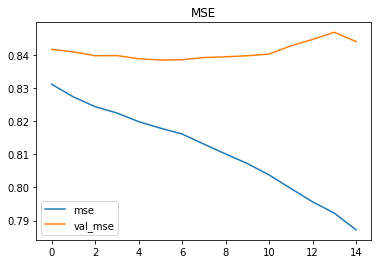

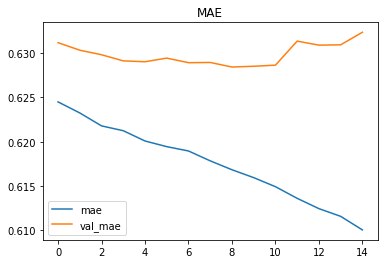

In [38]:
from sklearn.model_selection import KFold, StratifiedKFold

models = []
# kfold = KFold(5, shuffle=True, random_state=23)
kfold = StratifiedKFold(5, shuffle=True, random_state=23)

for i, (train_indices, target_indices) in enumerate(kfold.split(train[features], investment_id)):
    X_train, X_val = train.loc[train_indices, features], train.loc[target_indices, features]
    y_train, y_val = y.loc[train_indices], y.loc[target_indices]
    investment_id_train, investment_id_val = investment_id.loc[train_indices], investment_id.loc[target_indices]
    train_ds = make_dataset(X_train, y_train, investment_id_train)
    val_ds = make_dataset(X_val, y_val, investment_id_val, mode='val')

    model = get_model()
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=get_callbacks(i)
    )
    k.models.load_model(f'../outputs/models/simple_nn_{i}')
    models.append(model)

    pearson_score = stats.pearsonr(model.predict(val_ds).ravel(), y_val.values)
    print('Pearson:', pearson_score)
    pd.DataFrame(history.history, columns=['mse', 'val_mse']).plot()
    plt.title("MSE")
    pd.DataFrame(history.history, columns=['mae', 'val_mae']).plot()
    plt.title("MAE")
    plt.show()
    break

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
integer_lookup (IntegerLookup)  (None, 1)            0           input_34[0][0]                   
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 32)        114560      integer_lookup[9][0]             
__________________________________________________________________________________________________
reshape_9 (Reshape)             (None, 32)           0           embedding_9[0][0]                
___________________________________________________________________________________________

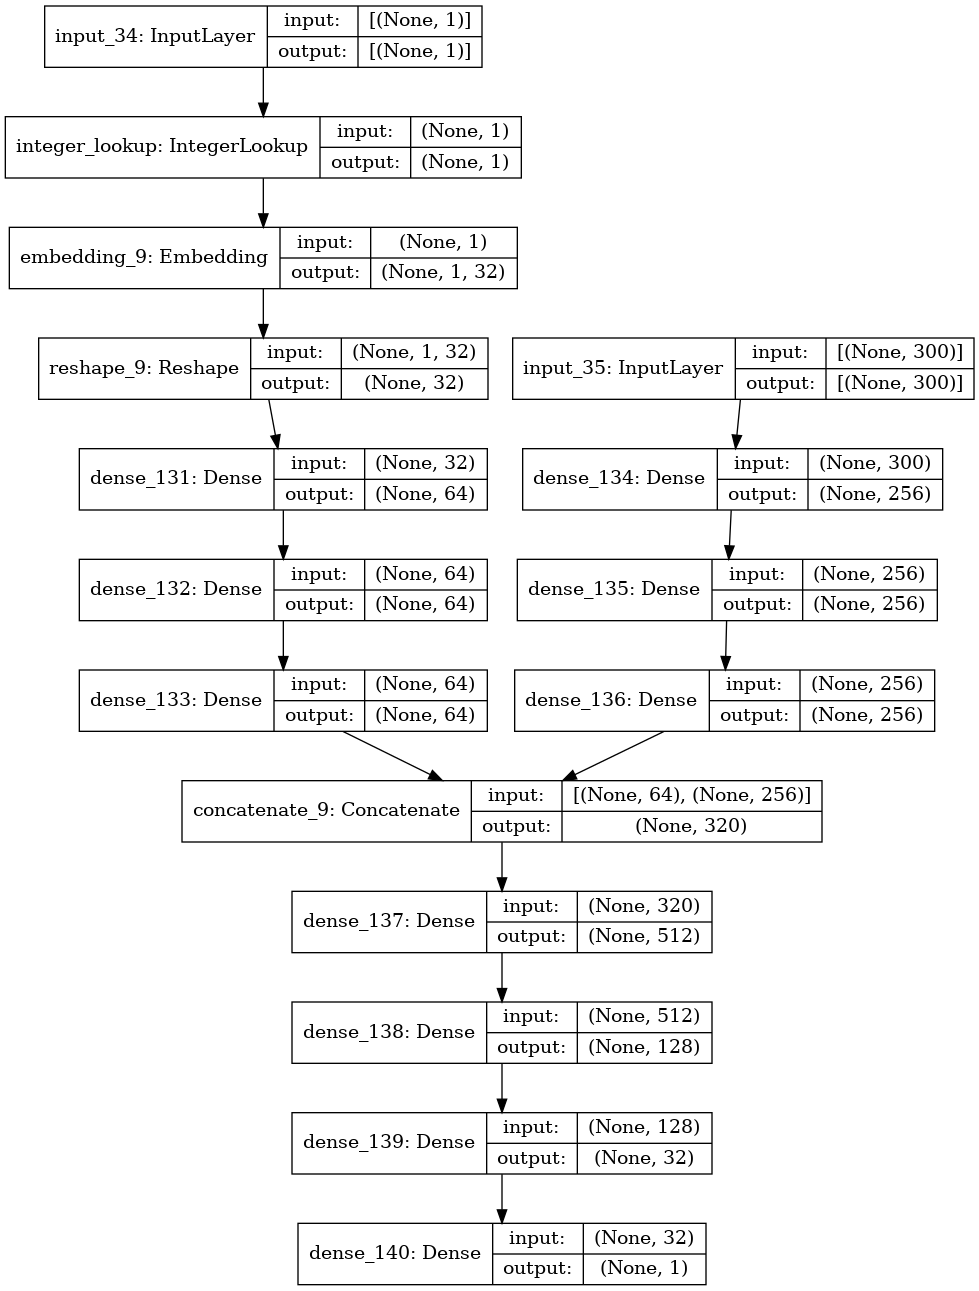

In [34]:
model = get_model()
model.summary()
k.utils.plot_model(model, show_shapes=True)

In [39]:
y

0         -0.300781
1         -0.231079
2          0.568848
3         -1.064453
4         -0.531738
             ...   
3141405    0.033600
3141406   -0.223267
3141407   -0.559570
3141408    0.009598
3141409    1.211914
Name: target, Length: 3141410, dtype: float16